In [70]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [71]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

work_dir = '../../data/results/'
img_dir = '../../data/img/'

synthetic_accuracy_binary = pd.read_csv(work_dir+'synthetic_accuracy_binary.csv', index_col='conf_probs')
synthetic_accuracy_prob = pd.read_csv(work_dir+'synthetic_accuracy_prob.csv', index_col='conf_probs')
improvement_synthetic_accuracy_binary = pd.read_csv(work_dir+'improvement_synthetic_accuracy_binary.csv', index_col='conf_probs')
improvement_synthetic_accuracy_prob = pd.read_csv(work_dir+'improvement_synthetic_accuracy_prob.csv', index_col='conf_probs')
synthetic_convergence = pd.read_csv(work_dir+'synthetic_convergence.csv', index_col='number of iterations')
synthetic_values = pd.read_csv(work_dir+'synthetic_values.csv', index_col='number of distinct values per object')
synthetic_accuracy_g = pd.read_csv(work_dir+'accuracy_g_transposed.csv', index_col='Accuracy of sources')

flight_accuracy = pd.read_csv(work_dir+'flight_accuracy.csv', index_col='G')
flight_efficiency = pd.read_csv(work_dir+'flight_efficiency.csv', index_col='Number of objects with confusions')

# face_accuracy = pd.read_csv(work_dir+'face_accuracy.csv')

# Synthetic Data Experiments

# Accuracy with P confusion

Vary the confusion probability in synthetic data (Probability).


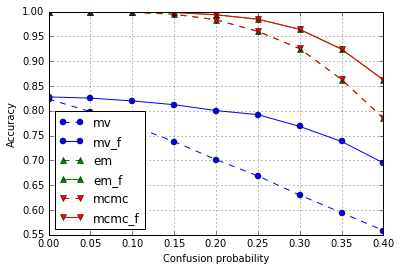

In [72]:
print("Vary the confusion probability in synthetic data (Probability).")
# errs = synthetic_accuracy_prob[['em_std', 'mcmc_std']].rename(columns={
#                                                                      'em std': 'em',
#                                                                      'mcmc std': 'mcmc',
#                                                                      })
ax = synthetic_accuracy_prob[['mv', 'mv_f', 'em', 'em_f', 'mcmc', 'mcmc_f']].plot(
    style=['bo--', 'bo-', 'g^--', 'g^-', 'rv--', 'rv-'], grid='on')

ax.set_ylabel('Accuracy')
ax.set_xlabel('Confusion probability')
fig = ax.get_figure()
# fig.savefig(img_dir+'synth_accuracy_probability.pdf')

Vary the confusion probability in synthetic data (Binary).


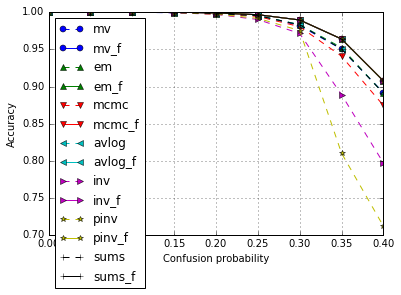

In [73]:
print("Vary the confusion probability in synthetic data (Binary).")

ax = synthetic_accuracy_binary[['mv', 'mv_f', 'em', 'em_f', 'mcmc', 'mcmc_f',
                               'avlog', 'avlog_f', 'inv', 'inv_f',
                               'pinv', 'pinv_f', 'sums', 'sums_f']].plot(
    style=['bo--', 'bo-', 'g^--', 'g^-', 'rv--', 'rv-',
           'c<--', 'c<-', 'm>--', 'm>-', 'y*--', 'y*-',
           'k+--', 'k+-', 'dd--', 'dd-'], grid='on')

ax.set_ylabel('Accuracy')
ax.set_xlabel('Confusion probability')
fig = ax.get_figure()
# fig.savefig(img_dir+'synth_accuracy_binary.pdf')

# Accuracy improvement with P confusion

Vary the confusion probability in synthetic data (Probability).


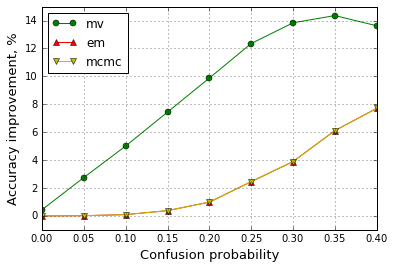

In [74]:
print("Vary the confusion probability in synthetic data (Probability).")
ax = improvement_synthetic_accuracy_prob[['mv', 'em', 'mcmc']].plot(
    style=['go-', 'r^-', 'yv-'], grid='on', ylim=[-1, 15])

ax.set_ylabel('Accuracy improvement, %', fontsize=13)
ax.set_xlabel('Confusion probability', fontsize=13)
fig = ax.get_figure()
# fig.savefig(img_dir+'improvement_synth_accuracy_probability.pdf')

Vary the confusion probability in synthetic data (Binary).


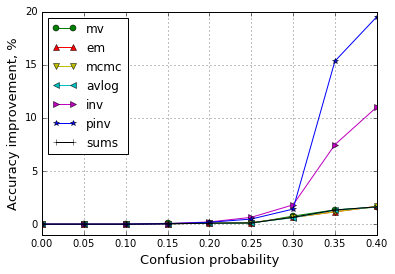

In [75]:
print("Vary the confusion probability in synthetic data (Binary).")
ax = improvement_synthetic_accuracy_binary[['mv', 'em', 'mcmc',
                                           'avlog', 'inv', 'pinv',
                                           'sums']].plot(
    style=['go-', 'r^-', 'yv-',
          'c<-', 'm>-', 'b*-',
          'k+-'], grid='on',
    ylim=[-1, 20])

ax.set_ylabel('Accuracy improvement, %', fontsize=13)
ax.set_xlabel('Confusion probability', fontsize=13)
fig = ax.get_figure()
# fig.savefig(img_dir+'improvement_synth_accuracy_binary.pdf')

# G Accuracy vs number of iteration

Convergence of MCMC.


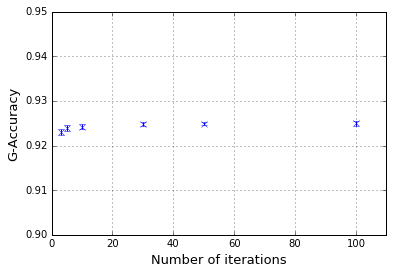

In [76]:
print("Convergence of MCMC.")
ax = synthetic_convergence.plot(marker='x',
                                linestyle='',
                                yerr=synthetic_convergence.error.values,
                                xlim=[0, 110],
                                ylim=[0.9, 0.95],
                                grid='on',
                                legend=False)
ax.set_ylabel('G-Accuracy', fontsize=13)
ax.set_xlabel('Number of iterations', fontsize=13)
fig = ax.get_figure()
# fig.savefig(img_dir+'synth_convergence.pdf')

Number of distinct values per object


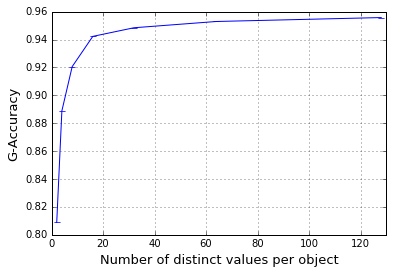

In [77]:
print("Number of distinct values per object")
errs = [x[0] for x in synthetic_values[['error']].values]
ax = synthetic_values[['G accuracy']].plot(grid='on', yerr=errs, xlim=[0, 130], legend=False)
ax.set_ylabel('G-Accuracy', fontsize=13)
ax.set_xlabel('Number of distinct values per object', fontsize=13)
fig = ax.get_figure()
# fig.savefig(img_dir+'synth_values.pdf')

# G Accuracy vs Sources Accuracy

G Accuracy vs Sources Accuracy


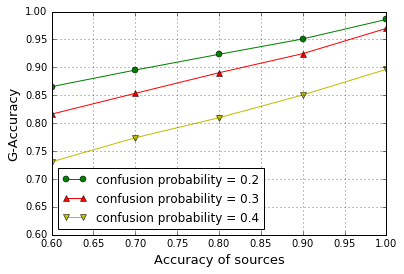

In [78]:
print("G Accuracy vs Sources Accuracy")
ax = synthetic_accuracy_g[['confusion probability = 0.2',
                          'confusion probability = 0.3',
                          'confusion probability = 0.4']].plot(style=['go-', 'r^-', 'yv-'], 
                                                               grid='on',
                                                               ylim=[0.6, 1.])

ax.set_ylabel('G-Accuracy', fontsize=13)
ax.set_xlabel('Accuracy of sources', fontsize=13)
fig = ax.get_figure()
# fig.savefig(img_dir+'g_accuracy_vs_s_accuracies.pdf')

# Real Data Experiments

## FOOD dataset

In [106]:
def plot_accu(file_name, title, ylim = None):
    df = pd.read_csv('{}'.format(file_name))
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))    
    markers = ['x', 'o', '^', '<']
    algos = ['truth_finder', 'D&S', 'mcmc_conf', 'mv']
    x = df['votes_per_item'].unique()[:-1].astype(int)
    x = np.append(x, [x[-1]+3])
    for alg, c, l, m in zip(algos, ['m', 'b', 'black', 'green'], ['--', '-.', '-', ':'], markers):
        y = df.loc[df['method'] == alg]['accuracy'].values
        y_std = df.loc[df['method'] == alg]['accuracy_std'].values
        ax[0].plot(x, y, label=alg, color=c, linestyle=l, marker=m)
        ax[0].errorbar(x, y, yerr=y_std, marker=m, linestyle=l, color=c)
        ax[0].set_xlabel('Num votes per item', size=14)
        
        ax[0].set_ylabel('Vote Aggregation Accuracy', size=14)
        ax[0].set_title(title, size=15)
            
    ax[0].legend( fontsize=12, loc=4)
    ax[0].set_xticks(x)
    xticklabels = x.astype(str)
    xticklabels[-1] = "all data"
    ax[0].set_xticklabels(xticklabels)
    if ylim:
        plt.ylim(ylim)
        
        
    y2 = df.loc[df['method'] == 'mcmc_conf']['accuracy_conf'].values
    y2_std = df.loc[df['method'] == 'mcmc_conf']['accuracy_conf_std'].values
    y2_pr = df.loc[df['method'] == 'mcmc_conf']['precision_conf'].values
    y2_pr_std = df.loc[df['method'] == 'mcmc_conf']['precision_std'].values
    y2_rec = df.loc[df['method'] == 'mcmc_conf']['recall_conf'].values
    y2_rec_std = df.loc[df['method'] == 'mcmc_conf']['recall_conf_std'].values
    ax[1].plot(x, y2, label='mcmc_conf Accuracy', color='black', linestyle='-', marker='^')
    ax[1].errorbar(x, y2, yerr=y2_std, color='black', linestyle='-', marker='^')
#     ax[1].plot(x, y2_pr, label='mcmc_conf Precision', color='black', linestyle='-.', marker='^')
#     ax[1].errorbar(x, y2_pr, yerr=y2_pr_std, color='black', linestyle='-.', marker='^')
#     ax[1].plot(x, y2_rec, label='mcmc_conf Recall', color='black', linestyle=':', marker='^')
#     ax[1].errorbar(x, y2_rec, yerr=y2_rec_std, color='black', linestyle=':', marker='^')
    
    y3 = df.loc[df['method'] == 'D&S']['ds_accuracy_conf'].values
    y3_std = df.loc[df['method'] == 'D&S']['ds_accuracy_conf_std'].values
    y3_pr = df.loc[df['method'] == 'D&S']['ds_precision_conf'].values
    y3_pr_std = df.loc[df['method'] == 'D&S']['ds_precision_std'].values
    y3_rec = df.loc[df['method'] == 'D&S']['ds_recall_conf'].values
    y3_rec_std = df.loc[df['method'] == 'D&S']['ds_recall_conf_std'].values 
    ax[1].plot(x, y3, label='D&S Accuracy', color='blue', linestyle='-', marker='o')
    ax[1].errorbar(x, y3, yerr=y3_std, color='blue', linestyle='-', marker='o')
#     ax[1].plot(x, y3_pr, label='D&S Precision', color='blue', linestyle='-.', marker='o')
#     ax[1].errorbar(x, y3_pr, yerr=y3_pr_std, color='blue', linestyle='-.', marker='o')
#     ax[1].plot(x, y3_rec, label='D&S Recall', color='blue', linestyle=':', marker='o')
#     ax[1].errorbar(x, y3_rec, yerr=y3_rec_std, color='blue', linestyle=':', marker='o')
    
    ax[1].set_xlabel('Num voted per item', size=14)
    ax[1].set_ylabel('Confusions Detection', size=14)
    ax[1].set_xticks(x)
    ax[1].set_xticklabels(xticklabels)
    ax[1].legend(fontsize=12, loc=4)
    ax[1].set_title('Confusion Detection', size=15)
    
    
    # display table
#     display(df[['votes_per_item', 'votes_per_worker_mean', 'votes_per_worker_std']].drop_duplicates().reset_index(drop=True))  

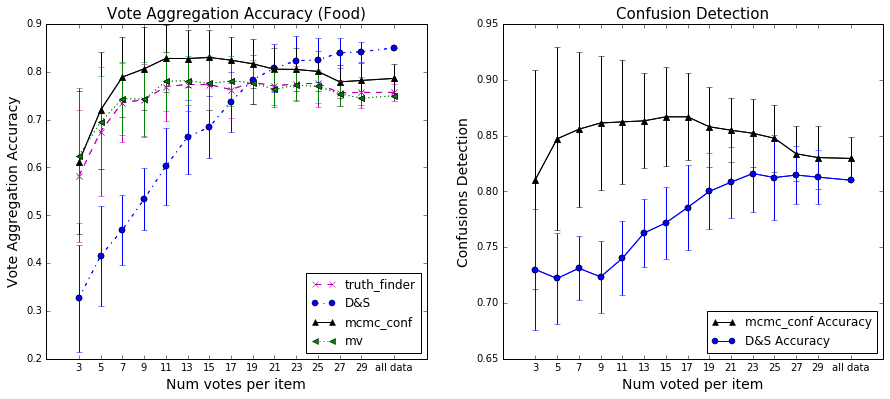

In [107]:
food_file = work_dir+'food_accuracy_votes_per_item.csv'
title_food = 'Vote Aggregation Accuracy (Food)'
plot_accu(food_file, title_food)

## FACES dataset

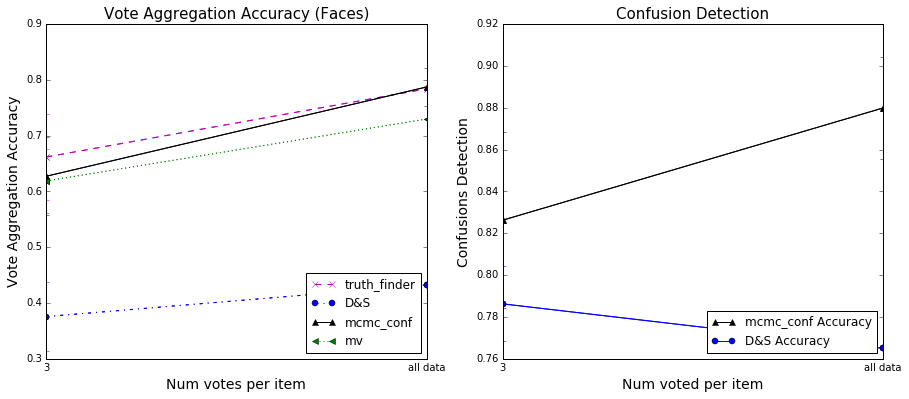

In [108]:
faces_file = work_dir+'faces_accuracy_votes_per_item.csv'
title_faces = 'Vote Aggregation Accuracy (Faces)'
plot_accu(faces_file, title_faces)

## FLAGS dataset

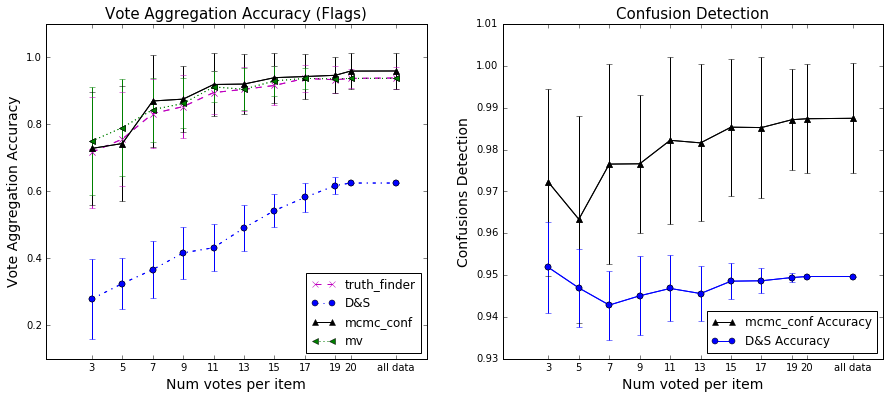

In [109]:
flags_file = work_dir+'flags_accuracy_votes_per_item.csv'
title_flags = 'Vote Aggregation Accuracy (Flags)'
plot_accu(flags_file, title_flags)

## PLOTS dataset

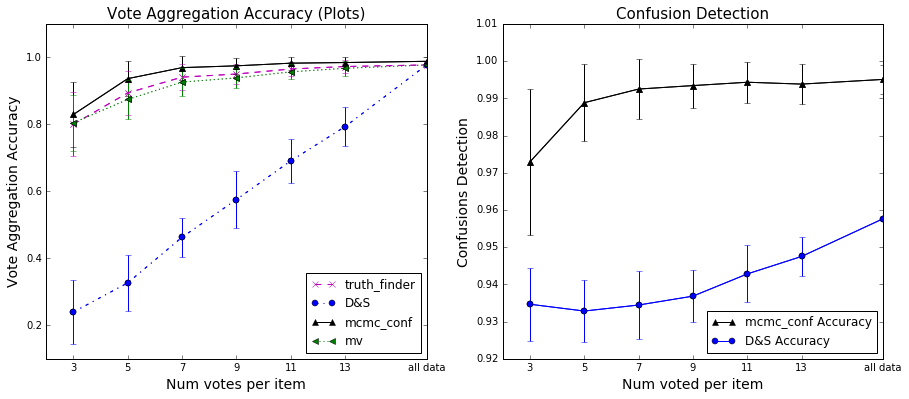

In [110]:
plots_file = work_dir+'plots_accuracy_votes_per_item.csv'
title_plots = 'Vote Aggregation Accuracy (Plots)'
plot_accu(plots_file, title_plots)